![](header.jpg)

# Data Mining GPS Tracks

Kevin J. Walchko

24 Apr 2020

---

## Data Set Information:

[![](https://archive.ics.uci.edu/ml/assets/logo.gif)](https://archive.ics.uci.edu/ml/datasets/GPS+Trajectories)

<table border="1" cellpadding="6">
	<tbody><tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">163</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Computer</p></td>
	</tr>
	<tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
		<td><p class="normal">Real</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
		<td><p class="normal">15</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
		<td><p class="normal">2016-02-29</p></td>
	</tr>
	<tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification, Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">Yes</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">103485</p></td>
	</tr></tbody>
</table>


The dataset is composed by two tables. The first table `go_track_tracks` presents general attributes and each instance has one trajectory that is represented by the table `go_track_trackspoints`.


### Attribute Information:

1. `go_track_tracks.csv`: a list of trajectories
    - id_android - it represents the device used to capture the instance;
    - speed - it represents the average speed (Km/H)
    - distance - it represent the total distance (Km)
    - rating - it is an evaluation parameter. Evaluation the traffic is a way to verify the volunteers perception about the traffic during the travel, in other words, if volunteers move to some place and face traffic jam, maybe they will evaluate 'bad'. (3- good, 2- normal, 1-bad).
    - rating_bus - it is other evaluation parameter. (1 - The amount of people inside the bus is little, 2 - The bus is not crowded, 3- The bus is crowded.
    - rating_weather - it is another evaluation parameter. ( 2- sunny, 1- raining).
    - car_or_bus - (1 - car, 2-bus)
    - linha - information about the bus that does the pathway
2. `go_track_trackspoints.csv`: localization points of each trajectory
    - id: unique key to identify each point
    - latitude: latitude from where the point is
    - longitude: longitude from where the point is
    - track_id: identify the trajectory which the point belong
    - time: datetime when the point was collected (GMT-3)

## References

- Stackexchange: [Matching GPS tracks](https://gis.stackexchange.com/a/81736)
- [GPS data from UCI](https://archive.ics.uci.edu/ml/datasets/GPS+Trajectories)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("GPS-Trajectory/go_track_trackspoints.csv")
df.head(10)

,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53
5,6,-10.938544,-37.062839,1,2014-09-13 07:24:59
6,7,-10.938346,-37.062588,1,2014-09-13 07:25:04
7,8,-10.938448,-37.062000,1,2014-09-13 07:25:10
8,9,-10.938666,-37.061499,1,2014-09-13 07:25:15
9,10,-10.938986,-37.060819,1,2014-09-13 07:25:21


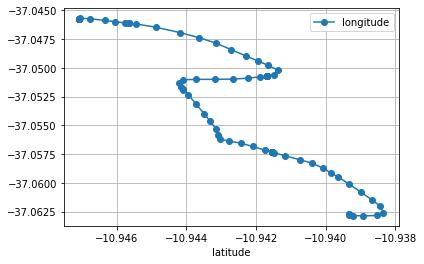

In [3]:
# Let's plot the first track and see what it looks like
first = df[df["track_id"] == 1]
first.plot(x="latitude", y="longitude", grid=True, marker='o');

In [4]:
# let's see how many points are in this column of data
df[df["track_id"]==1]["id"].count()

90

In [5]:
# Let's find some of the longer tracks
m=df.groupby("track_id")["id"].count()
m.sort_values(ascending=False)

track_id
31       646
30       646
41       433
37962    410
26       401
        ... 
37993      1
159        1
171        1
38030      1
37998      1
Name: id, Length: 163, dtype: int64

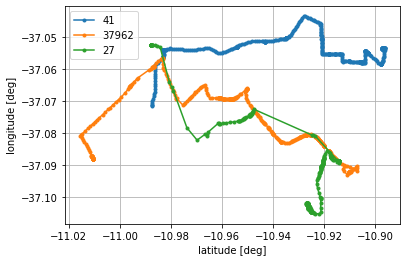

In [6]:
# Let's plot some tracks, 30/31 are separate from the rest, so
# we won't plot them. Just focus on these 3 tracks.
# You can see the data has gaps in GPS coverage with big distances
# just shown as a straight line
fig = plt.figure()
for i in [41,37962,27]:
    y = df[df["track_id"] == i]
    plt.plot(y["latitude"], y["longitude"], label=str(i), marker=".")
plt.grid(True)
plt.legend()
plt.ylabel("longitude [deg]")
plt.xlabel("latitude [deg]");

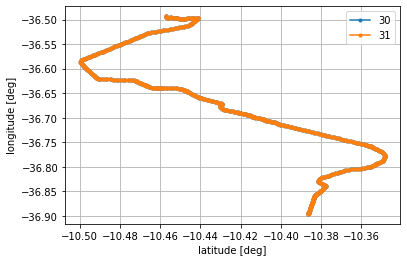

In [7]:
# These tracks appeart to be duplicates or 2 people travelling together
fig = plt.figure()
for i in [30,31]:
    y = df[df["track_id"] == i]
    plt.plot(y["latitude"], y["longitude"], label=str(i), marker=".")
plt.grid(True)
plt.legend()
plt.ylabel("longitude [deg]")
plt.xlabel("latitude [deg]");

# Todo

What I want to do find a way to pull a random track from this bunch, say it is "ground truth" and try to match it to the correct track it came from **efficiently**. Not sure how to do that other than bruit force.

In [9]:
from scipy.spatial import KDTree
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist

x, y = np.mgrid[0:5, 2:8]
points = list(zip(x.ravel(), y.ravel()))

tree = KDTree(points)
# tree.data == points

# Querying for the nearest point to (1.9, 1.9) using Euclidean distance
distance, index = tree.query((1.9, 1.9))
# distance == 0.14142135623730964 == np.sqrt((2 - 1.9)**2 + (2 - 1.9)**2)
# index == 12; points[index] == points[12] == (2, 2)

In [10]:
aa=first.values.tolist()

In [11]:
first.head()

,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53


In [12]:
d=first[["latitude","longitude"]].values.tolist()
d[:3]

[[-10.9393413858164, -37.0627421097422],
 [-10.939341385769, -37.0627421097809],
 [-10.9393239478718, -37.0627645137212]]

In [13]:
tree = KDTree(d)

In [14]:
distance, index = tree.query((-10.94, -37.06))
print(distance, index)
print(d[index])

0.0006127626434870153 11
[-10.9396414360875, -37.0595030996298]


In [15]:
# from scipy.spatial.distance import pdist
np.sum(pdist(d))

27.180585895952014

In [16]:
# from scipy.spatial.distance import cdist
 
XA = np.random.rand(4,2)
XB = np.random.rand(4,2)

print(XA)
print(XB)

my_individual_dist = cdist(XA,XB,"euclidean")
print(my_individual_dist)

[[0.19136763 0.28524318]
 [0.04637592 0.80493098]
 [0.27024627 0.33590423]
 [0.75068599 0.05953289]]
[[0.1962612  0.27463631]
 [0.78772716 0.24363733]
 [0.33490917 0.65976631]
 [0.16998098 0.92815263]]
[[0.0116813  0.59780912 0.40108821 0.64326507]
 [0.5510699  0.92986677 0.3229926  0.17453306]
 [0.09606013 0.52564213 0.33025436 0.6006757 ]
 [0.59469011 0.18779375 0.73017157 1.04485337]]


In [55]:
%%timeit
m=map(lambda v: v[0]-v[1],zip(range(1000), range(1000)))

1.13 µs ± 125 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [51]:
%%timeit
m = []
a=range(1000)
b = range(1000)
for i in range(len(a)):
    m.append(a[i]-b[i])

427 µs ± 62.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [53]:
%%timeit
m = []
a=range(1000)
b = range(1000)
for aa,bb in zip(a,b):
    m.append(aa-bb)

139 µs ± 13.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [57]:
%%timeit
m = [a-b for a,b in zip(range(1000),range(1000))]

93.5 µs ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [19]:
np.random.seed(20140201)
num_pts = 50
points_a = np.vstack([
    np.linspace(0., 10., num=num_pts),
    np.linspace(10., 0., num=num_pts)
    ]).T

points_b = points_a + np.random.random([num_pts, 2]) - 0.5
points_c = points_a + np.random.random([num_pts, 2]) - 0.5
points_d = points_a + np.vstack([
    np.sin(np.linspace(0., 2 * np.pi, num_pts)),
    np.sin(np.linspace(0., 2 * np.pi, num_pts)),
    ]).T

all_trails = [points_a, points_b, points_c, points_d]

tolerance = 0.1

labelled_pts = np.vstack([
    np.hstack([a, np.ones((a.shape[0], 1)) * i])
    for i, a in enumerate(all_trails)
])

tree = KDTree(labelled_pts[:, :2])

points_within_tolerance = tree.query_ball_point(labelled_pts[:, :2], tolerance)

In [41]:
# labelled_pts
points_within_tolerance

array([list([0, 150]), list([1]), list([2]), list([3]), list([4]),
       list([5]), list([6]), list([7, 106]), list([8]), list([9]),
       list([10]), list([11]), list([12]), list([13]), list([14]),
       list([15]), list([16, 117]), list([17, 116]), list([18]),
       list([19]), list([20]), list([21]), list([22, 71, 120]),
       list([23]), list([24, 174]), list([25, 175]), list([26, 77]),
       list([27]), list([28, 79, 129]), list([29]), list([30]),
       list([31]), list([32]), list([33, 135]), list([34, 132]),
       list([35]), list([36, 84, 88]), list([37, 138]), list([38]),
       list([39]), list([40]), list([41]), list([42]), list([43]),
       list([44, 96]), list([45, 97, 146]), list([46]), list([47]),
       list([48]), list([49, 199]), list([50]), list([51]), list([52]),
       list([53]), list([54]), list([55]), list([56]), list([57, 107]),
       list([58, 59]), list([58, 59]), list([60, 62]), list([61]),
       list([60, 62]), list([63]), list([64]), list([65]),

In [20]:
vfunc = np.vectorize(lambda a: np.any(labelled_pts[a, 2] != labelled_pts[a[0], 2]))

matches = vfunc(points_within_tolerance)
matching_points = labelled_pts[matches, :2]

In [21]:
import scipy.cluster.hierarchy

clusters = scipy.cluster.hierarchy.fclusterdata(matching_points, tolerance, 'distance')

In [22]:
print(np.hstack([
    matching_points,              #x, y
    np.vstack([
        labelled_pts[matches, 2], #original_trail
        clusters                  #segment
    ]).T
]))

[[ 0.00000000e+00  1.00000000e+01  0.00000000e+00  4.00000000e+00]
 [ 1.42857143e+00  8.57142857e+00  0.00000000e+00  1.00000000e+00]
 [ 3.26530612e+00  6.73469388e+00  0.00000000e+00  1.00000000e+01]
 [ 3.46938776e+00  6.53061224e+00  0.00000000e+00  1.10000000e+01]
 [ 4.48979592e+00  5.51020408e+00  0.00000000e+00  1.90000000e+01]
 [ 4.89795918e+00  5.10204082e+00  0.00000000e+00  2.00000000e+01]
 [ 5.10204082e+00  4.89795918e+00  0.00000000e+00  2.30000000e+01]
 [ 5.30612245e+00  4.69387755e+00  0.00000000e+00  2.20000000e+01]
 [ 5.71428571e+00  4.28571429e+00  0.00000000e+00  1.80000000e+01]
 [ 6.73469388e+00  3.26530612e+00  0.00000000e+00  1.60000000e+01]
 [ 6.93877551e+00  3.06122449e+00  0.00000000e+00  1.50000000e+01]
 [ 7.34693878e+00  2.65306122e+00  0.00000000e+00  1.20000000e+01]
 [ 7.55102041e+00  2.44897959e+00  0.00000000e+00  1.30000000e+01]
 [ 8.97959184e+00  1.02040816e+00  0.00000000e+00  6.00000000e+00]
 [ 9.18367347e+00  8.16326531e-01  0.00000000e+00  7.00000000e

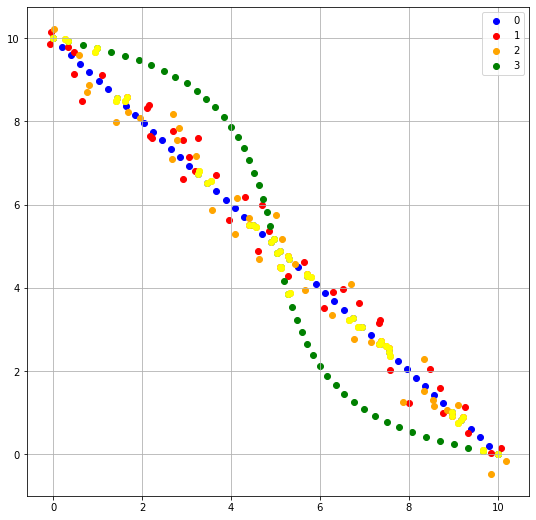

In [55]:
from itertools import cycle
import matplotlib.pyplot as plt


plt.subplots(1,1,figsize=(9,9))
for pts, colour, i in zip(all_trails, cycle(['blue', 'red', 'orange', 'green']), range(5)):
    plt.scatter(pts[:, 0], pts[:, 1], c=colour, label=str(i))

for clust_idx in set(clusters):
    plt.scatter(
        matching_points[clusters == clust_idx, 0], 
        matching_points[clusters == clust_idx, 1],
        c='yellow')
plt.legend()
plt.grid(True)

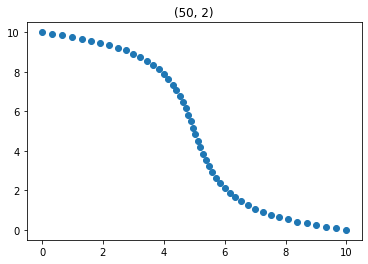

In [37]:
num = 3
plt.scatter(all_trails[num][:,0],all_trails[num][:,1])
plt.title(all_trails[num].shape);

In [50]:
len(all_trails)

4